In [139]:
import numpy as np
from scipy import signal

In [140]:
aqi_readings = np.random.randint(50, 80, 1440)
y = np.linspace(0, 1440, 1440)

In [141]:
print(aqi_readings[:5])

[74 54 59 51 74]


In [142]:
aqi_noise = np.random.randint(1, 1440, 200)

In [143]:
for i in aqi_noise:
    aqi_readings[i]+=50

In [144]:
def find_avg_hourly(arr):
    avg_hourly=[]
    for i in range(0, 1440, 60):
        total=0
        for j in range(0, 60):
            total+=arr[i+j]
        avg = total/60;
        avg_hourly.append(avg)
    return np.array(avg_hourly)

In [145]:
avg_hour = find_avg_hourly(aqi_readings)
print(len(avg_hour))
print(avg_hour[:5])

24
[73.46666667 69.58333333 69.31666667 72.6        69.63333333]


In [146]:
import matplotlib.pyplot as plt

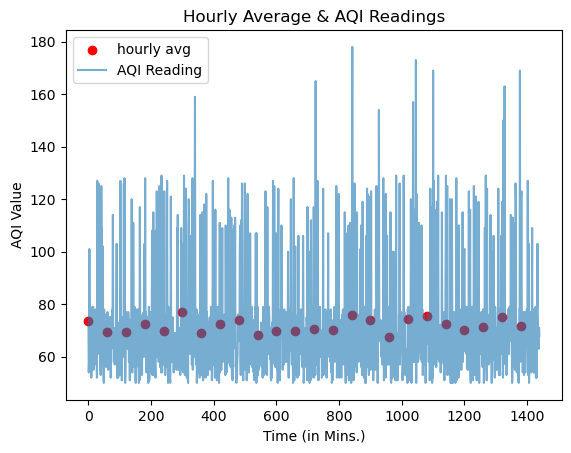

In [147]:
y_hourly = []
for i in range(0, 1440, 60):
    y_hourly.append(i)
plt.scatter(y_hourly, avg_hour, marker='o', color='red', alpha=1, label='hourly avg')
plt.plot(aqi_readings, alpha=0.6, label='AQI Reading')
plt.legend()
plt.title('Hourly Average & AQI Readings')
plt.xlabel('Time (in Mins.)')
plt.ylabel("AQI Value")
plt.show()
plt.show()

In [148]:
def make_disruption(i, arr):
    for a in range(i, i+15):
        arr[a]+=50

In [149]:
make_disruption(6, aqi_readings)

In [150]:
make_disruption(67, aqi_readings)

In [151]:
make_disruption(678, aqi_readings)

In [152]:
def find_disruptions(arr):
    disrupt_ind = []
    for i in range(14, 1440):
        flag = True
        for j in range(i-14, i+1):
            if(arr[j]<100):
                flag = False
                break
        if(flag):
            disrupt_ind.append(i)
    return disrupt_ind
        

In [153]:
disrupt_ind = find_disruptions(aqi_readings)

In [154]:
print(disrupt_ind)

[20, 81, 692]


In [155]:
def add_disrupt_ind(indexes):
    ind=[]
    values=[]
    for j in indexes:
        for i in range(j-14, j+1):
            ind.append(i)
            values.append(aqi_readings[i])
    return ind, values

In [156]:
disrupt_full_ind, disrupt_full_values = add_disrupt_ind(disrupt_ind)

In [157]:
print(disrupt_full_ind)
print(disrupt_full_values)

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692]
[122, 111, 125, 102, 105, 119, 111, 129, 121, 129, 105, 120, 121, 119, 125, 125, 115, 108, 125, 102, 125, 118, 113, 124, 128, 127, 164, 118, 119, 108, 128, 128, 124, 108, 108, 106, 123, 156, 129, 100, 108, 121, 110, 108, 118]


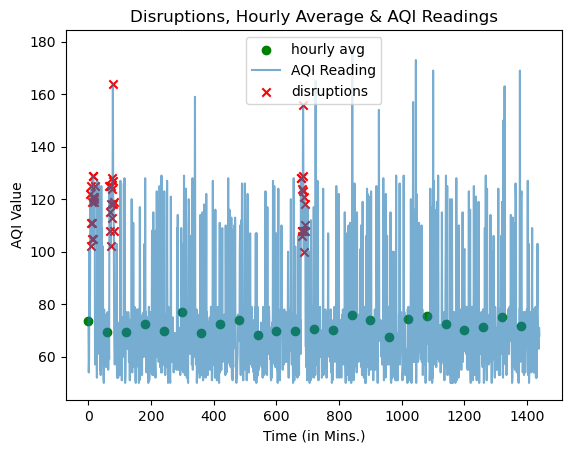

In [158]:
plt.scatter(y_hourly, avg_hour, marker='o', color='green', alpha=1, label='hourly avg')
plt.plot(aqi_readings, alpha=0.6, label='AQI Reading')
plt.scatter(disrupt_full_ind, disrupt_full_values, marker='x', color='red', alpha=1, label='disruptions')
plt.legend()
plt.title('Disruptions, Hourly Average & AQI Readings')
plt.xlabel('Time (in Mins.)')
plt.ylabel("AQI Value")
plt.show()

In [159]:
def filter(arr):
    for i in range(0, 1440):
        if(arr[i]>120):
            arr[i]=120
        if(arr[i]<30):
            arr[i] = 30
    return arr

In [160]:
smooth = filter(aqi_readings)

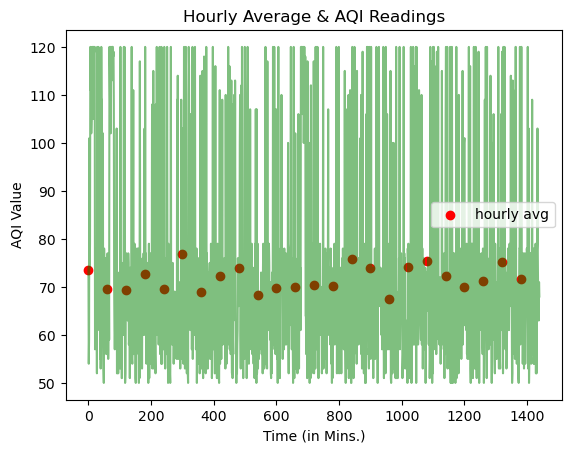

In [161]:
y_hourly = []
for i in range(0, 1440, 60):
    y_hourly.append(i)
plt.scatter(y_hourly, avg_hour, marker='o', color='red', alpha=1, label='hourly avg')
plt.plot(smooth, color='green', alpha=0.5)
plt.legend()
plt.title('Hourly Average & AQI Readings')
plt.xlabel('Time (in Mins.)')
plt.ylabel("AQI Value")
plt.show()
plt.show()